In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
#Load the iris dataset from sklearn
iris_df = datasets.load_iris()

In [3]:
#Understand about data
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
#Select features and target for the sake of medium article
#https://medium.com/p/5588dd5ad6cb
X = iris_df['data'][:,:2]
y = (iris_df['target']!=0)*1

In [7]:
#Visualize the data

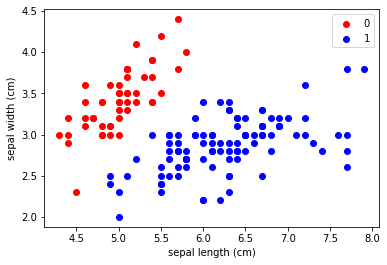

In [8]:
cut_point = (y==0).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend([0,1])
plt.show()

In [9]:
# 3 primary cores

In [10]:
# Algorithm - sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Loss function - cross entropy
def loss_function(y, X, W):
    return np.mean(-y*np.log(sigmoid(X*W)) - (1-y)*np.log(sigmoid(1-X*W)))

#Optimizer - gradient descent
def gradient_descent(W, X, y):
    return np.dot(X.T, (X*W - y))/y.shape[0]

def weight_update(W, X, y, learning_rate):
    W -= learning_rate*gradient_descent(W, X, y)             
    return W

In [11]:
# Prediction
def predict_prob(X, W):
    return sigmoid(np.dot(X, W))

def predict(X, W, threshold):
    return predict_prob(X, W) >= threshold
 
    

In [12]:
#Combine everything together into a module
class LogisticRegression():
    def __init__(self, 
                 learning_rate = 0.01, 
                 num_iter = 10000, 
                 fit_intercept = True, 
                threshold =0.5):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.threshold = threshold
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis =1)
    
    # Algorithm - sigmoid function
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))

    #Loss function - cross entropy
    def __loss_function(self, y, h):
        return np.mean(-y*np.log(h) - (1-y)*np.log(h))

    #Optimizer - gradient descent
    def __gradient_descent(self,h, X, y):
        return np.dot(X.T, (h - y))/y.shape[0]

    def __weight_update(self,h, X, y, W, learning_rate):
        W -= learning_rate*self.__gradient_descent(h, X, y)             
        return W    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        #Init weights W
        self.W = np.zeros(X.shape[1])
        #Find the optimal weights
        for i in range(self.num_iter):
            z = np.dot(X,self.W )
            h = self.__sigmoid(z)
#             loss_value = self.__loss_function(y, h)
            self.W = self.__weight_update(h, X, y, self.W, self.learning_rate)
            
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.W))

    def predict(self, X):
        return (self.predict_prob(X) >= self.threshold)*1

In [13]:
#Init a logistic regression model 
cl = LogisticRegression()

In [14]:
#Fit the data with the initialized model
cl.fit(X,y)

In [15]:
#Look at the weights of the trained model
cl.W

array([-0.79124711,  2.96330082, -4.83609502])

In [16]:
#Do prediction
preds = cl.predict(X)

In [17]:
#Accuracy
(preds==y).mean()

0.9933333333333333

In [18]:
#Get the decision boudary
#Check https://medium.com/@hqtquynhtram/is-logistic-regression-a-linear-classifier-8be688302273
#X2 = -(-0.79124711+2.96330082*X1)/-4.83609502
#call decision boudary as d
x_d1 = 4
y_d1 = -(cl.W[0]+cl.W[1]*x_d1)/cl.W[2]
x_d2 = 7
y_d2 = -(cl.W[0]+cl.W[1]*x_d2)/cl.W[2]

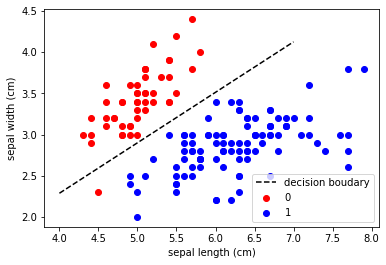

In [19]:
#Visualize the decision boudary
cut_point = (y==0).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.plot([x_d1, x_d2], [y_d1, y_d2], '--', color ='black' )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['decision boudary', 0,1,])
plt.show()

In [34]:
#Try with different hyperparameters
cl = LogisticRegression(learning_rate =0.1,num_iter=300000)

In [35]:
cl.fit(X,y)

In [36]:
cl.W

array([-25.89066442,  12.523156  , -13.40150447])

In [37]:
preds = cl.predict(X)

In [38]:
(preds==y).mean()

1.0

In [39]:
#Get the decision boudary
#Check https://medium.com/@hqtquynhtram/is-logistic-regression-a-linear-classifier-8be688302273
#X2 = -(-0.79124711+2.96330082*X1)/-4.83609502
#call decision boudary as d
x_d1 = 0
y_d1 = -(cl.W[0]+cl.W[1]*x_d1)/cl.W[2]
x_d2 = 7
y_d2 = -(cl.W[0]+cl.W[1]*x_d2)/cl.W[2]

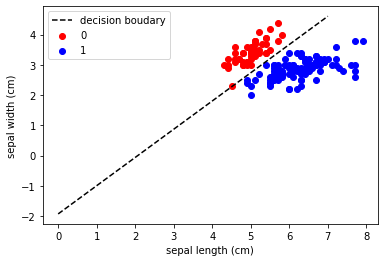

In [40]:
#Visualize the decision boudary
cut_point = (y==0).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.plot([x_d1, x_d2], [y_d1, y_d2], '--', color ='black' )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['decision boudary', 0,1,])
plt.show()

In [27]:
#Without intercept
cl = LogisticRegression(fit_intercept=False)

In [28]:
cl.fit(X,y)

In [29]:
cl.W

array([ 2.87860762, -4.9396812 ])

In [30]:
preds = cl.predict(X)

In [31]:
(preds==y).mean()

0.9933333333333333

In [32]:
#Get the decision boudary
#Check https://medium.com/@hqtquynhtram/is-logistic-regression-a-linear-classifier-8be688302273
#X2 = -(-0.79124711+2.96330082*X1)/-4.83609502
#call decision boudary as d
x_d1 = 0
y_d1 = -(cl.W[0]*x_d1)/cl.W[1]
x_d2 = 7
y_d2 = -(cl.W[0]*x_d2)/cl.W[1]

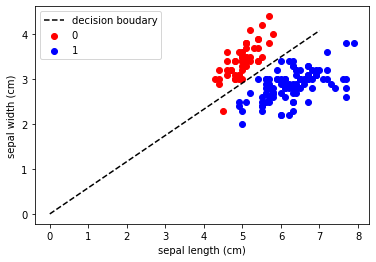

In [33]:
#Visualize the decision boudary
cut_point = (y==0).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.plot([x_d1, x_d2], [y_d1, y_d2], '--', color ='black' )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['decision boudary', 0,1,])
plt.show()